# Predicting Poker Hand
STEP 1: Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

STEP 2: Loading the Dataset

In [4]:
poker_df = pd.read_csv('/content/poker_hand_test.data')
poker_df

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [5]:
####3) naming the columns
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [6]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = poker_df.iloc[:, 0:9]
y = poker_df.hand

STEP 5: Visualizing whether class balance is present in our dataset or not

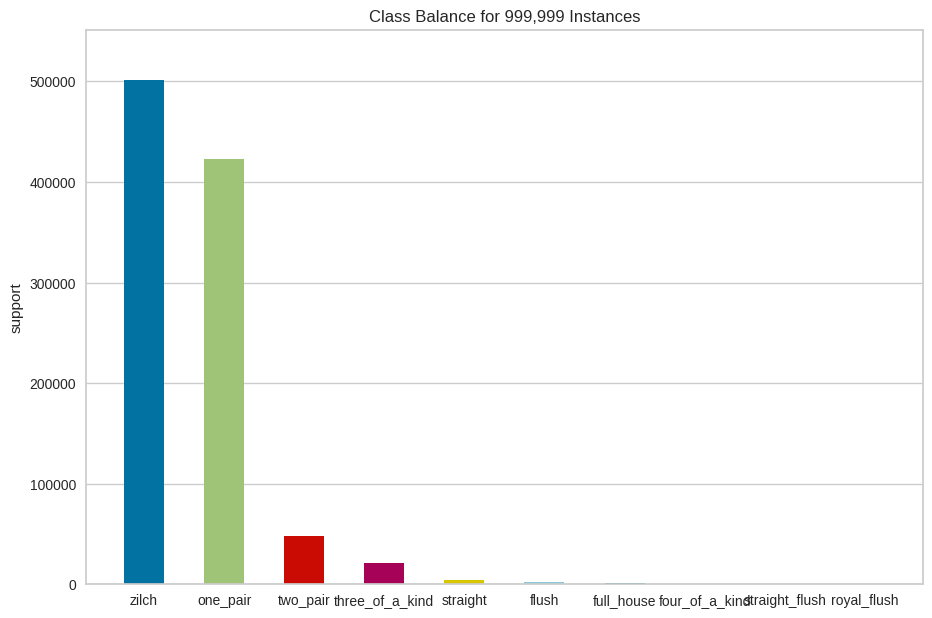

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [7]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError
balance = ClassBalance(size=(1080,720), labels=labels)
balance.fit(y)
balance.show()

It can be observed that there is class imbalance present in our dataswt, and we must remove it.

STEP 6: Up-sampling for minority classes

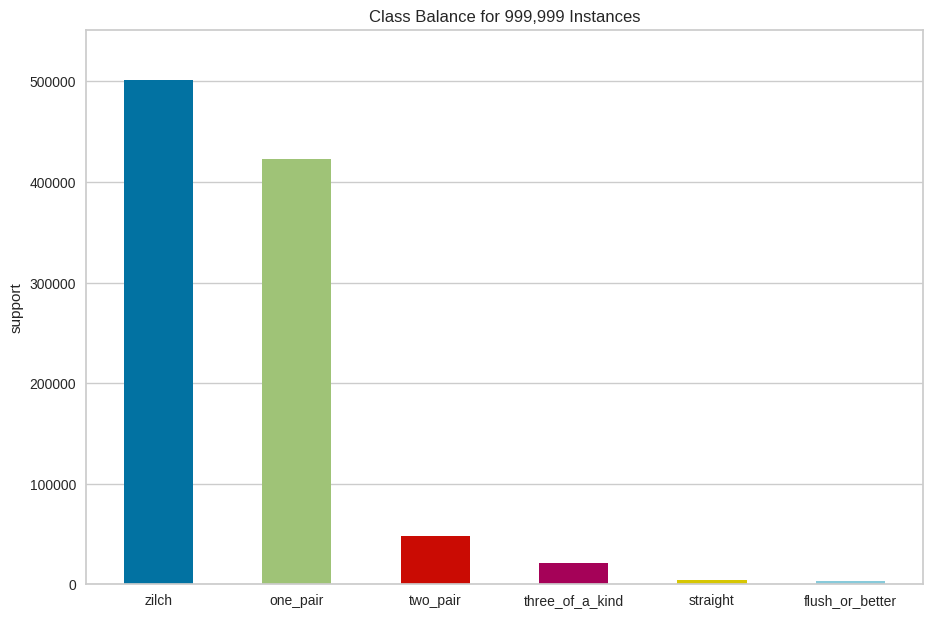

<Axes: title={'center': 'Class Balance for 999,999 Instances'}, ylabel='support'>

In [8]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['zilch', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

STEP 7: Training the Random Forests Classifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

STEP 8: Evaluating the model

In [10]:
######A) Classifiaction Accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of the Model on Train Data is : 0.773739547479095
Accuracy of the Model on Test Data is : 0.774522


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  return


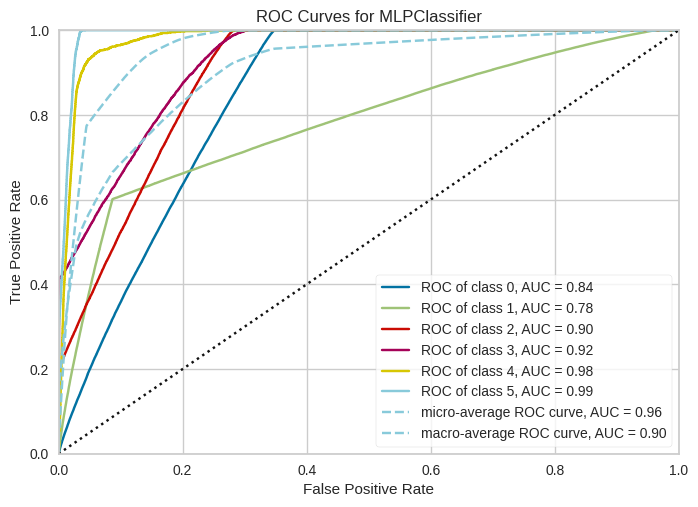

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
### B) ROC CURVE and AUC:
visualizer = ROCAUC(CLF)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


STEP 9: Classification Report Heatmap

/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  The class to report if `average='binary'` and the data is binary,


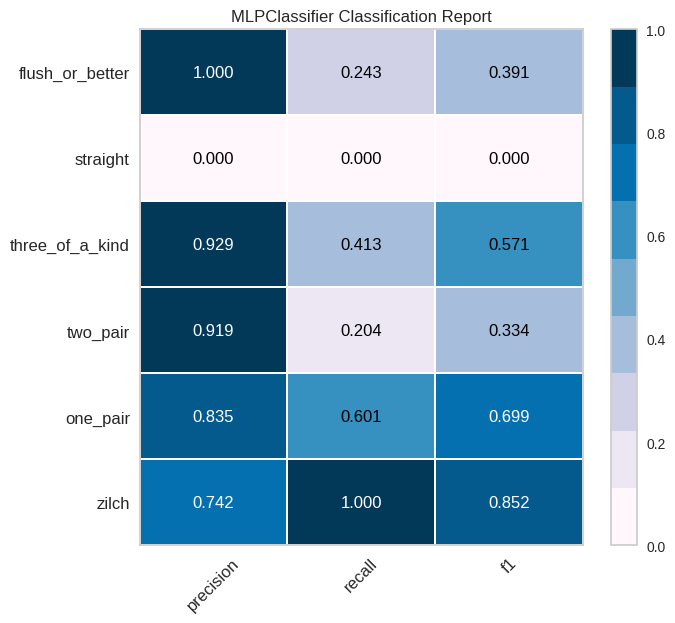

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [17]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

STEP 10: Class Prediction error

/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


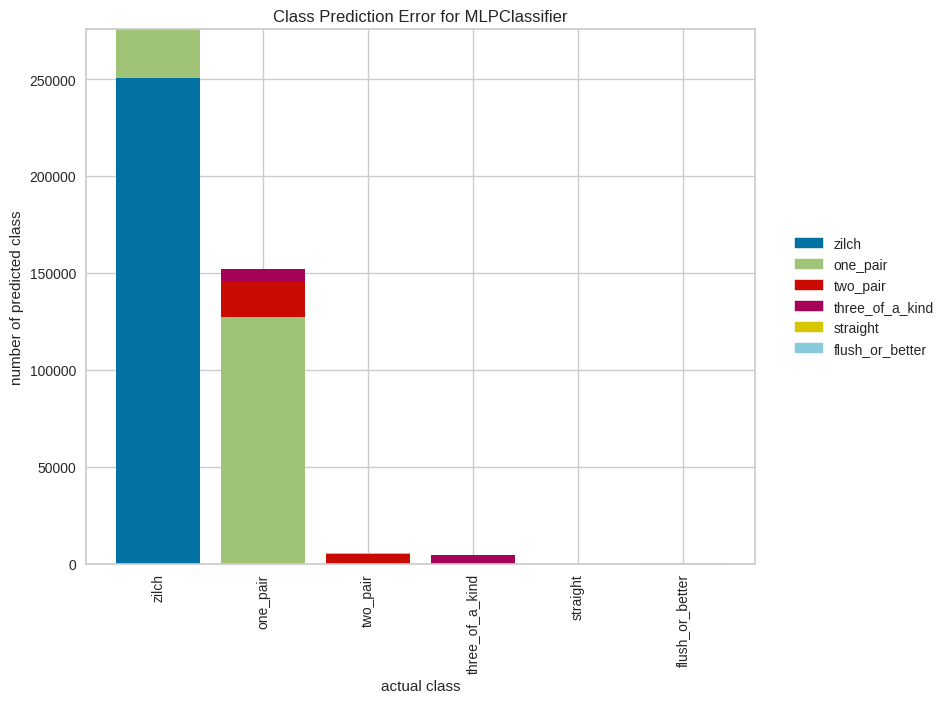

<Axes: title={'center': 'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [18]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()